<h1>Emotions Detection - Decision Tree Classifier</h1>

<h3>Import Dependencies</h3>

In [41]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#model selection 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

<h3>Load Dataset</h3>

In [42]:
#load the dataset
data = pd.read_csv('emotion_cleanned_dataset.csv')
data.drop(['Unnamed: 0','sentiment'], axis=1, inplace=True)
data.tail()

,text,emotion
17995,keep feeling like someone unkind wrong think g...,anger
17996,im feeling little cranky negative doctors appo...,anger
17997,feel useful people gives great feeling achieve...,joy
17998,im feeling comfortable derby feel though start...,joy
17999,feel weird meet w people text like dont talk f...,fear


<h3>Data Preprocessing</h3>

In [43]:
#encode the emotion text into the numerical variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['emotion'])

data[['text','label','emotion']].drop_duplicates(keep='first').head()

,text,label,emotion
0,didnt feel humiliated,4,sadness
1,go feeling hopeless damned hopeful around some...,4,sadness
2,im grabbing minute post feel greedy wrong,0,anger
3,ever feeling nostalgic fireplace know still pr...,3,love
4,feeling grouchy,0,anger


In [44]:
#define the train and test
X_feature = data['text']
Y_feature = data['label']

In [45]:
#apply countvectorizer into text
#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(X_feature)
#get the feature by names
count_vectorizer.get_feature_names()[0:10]

['aa',
 'aaaaaaand',
 'aaaaand',
 'aaaah',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon']

In [46]:
#apply train test split
x_train, x_test, y_train, y_test = train_test_split(X,Y_feature, test_size=0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12600, 16017)
(12600,)
(5400, 16017)
(5400,)


<h3>Train Model</h3>

In [47]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model)

DecisionTreeClassifier()


<h3>Evaluate Model</h3>

In [48]:
#METHOD 1
model.score(x_test, y_test)

0.8759259259259259

In [49]:
#METHOD 2
y_pred = model.predict(x_test)
y_pred[0:10]

array([4, 1, 3, 4, 2, 4, 0, 1, 2, 2])

In [50]:
#check accuracy
print()
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()


Decision Tree Accuracy: 0.8759259259259259



In [51]:
#train set accuracy
#Check train data score of model
print("*" * 20, "Train Set - Score","*"*20)
train_score = model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 10)
print("Model Score (%) :", train_score * 100)

******************** Train Set - Score ********************
Model Score: 0.9981746031746032
********************
Model Score (%) : 99.81746031746032


In [52]:
#Check test data score of model
print("*" * 20, "Test Set - Score","*"*20)
test_score = model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 10)
print("Model Score (%) :", test_score * 100)

******************** Test Set - Score ********************
Model Score: 0.8759259259259259
********************
Model Score (%) : 87.5925925925926


In [53]:
#METHOD 3
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       685
           1       0.83      0.85      0.84       641
           2       0.92      0.89      0.91      1814
           3       0.79      0.77      0.78       455
           4       0.91      0.90      0.91      1607
           5       0.73      0.73      0.73       198

    accuracy                           0.88      5400
   macro avg       0.83      0.84      0.84      5400
weighted avg       0.88      0.88      0.88      5400



<Figure size 1080x360 with 0 Axes>

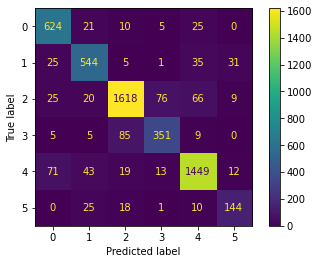

In [54]:
#plot_confusion_metrice
plt.figure(figsize=(15,5))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

#our data is imBalance dataset 

<h3>Model Testing</h3>

In [61]:
#make a function to make the prediction
def make_emotion_prediction(text, model):
    #transform text
    #ma_text = count_vectorizer.transform(text).toarray()
    #make the prediction
    predicted_result = model.predict(ma_text)
    #calculate Probability 
    proba_result = model.predict_proba(ma_text)
    #show all of percentages
    all_proba_result = dict(zip(model.classes_, proba_result[0]))
    #print the result
    print(predicted_result[0])
    return all_proba_result

In [62]:
#test model
make_emotion_prediction('i hate this cooking and food', model)

0


{0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}

In [63]:
ma_text = ['i love this cooking and food']
#vectorize ma text
ma_text = count_vectorizer.transform(ma_text).toarray()

#make the prediction
#print(model.predict(ma_text))
result = model.predict(ma_text)
#result = label_encoder.transform(result)
print(result)

[0]


In [64]:
#get the model classes
print(model.classes_)
print(data.emotion.unique())

[0 1 2 3 4 5]
['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
